In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


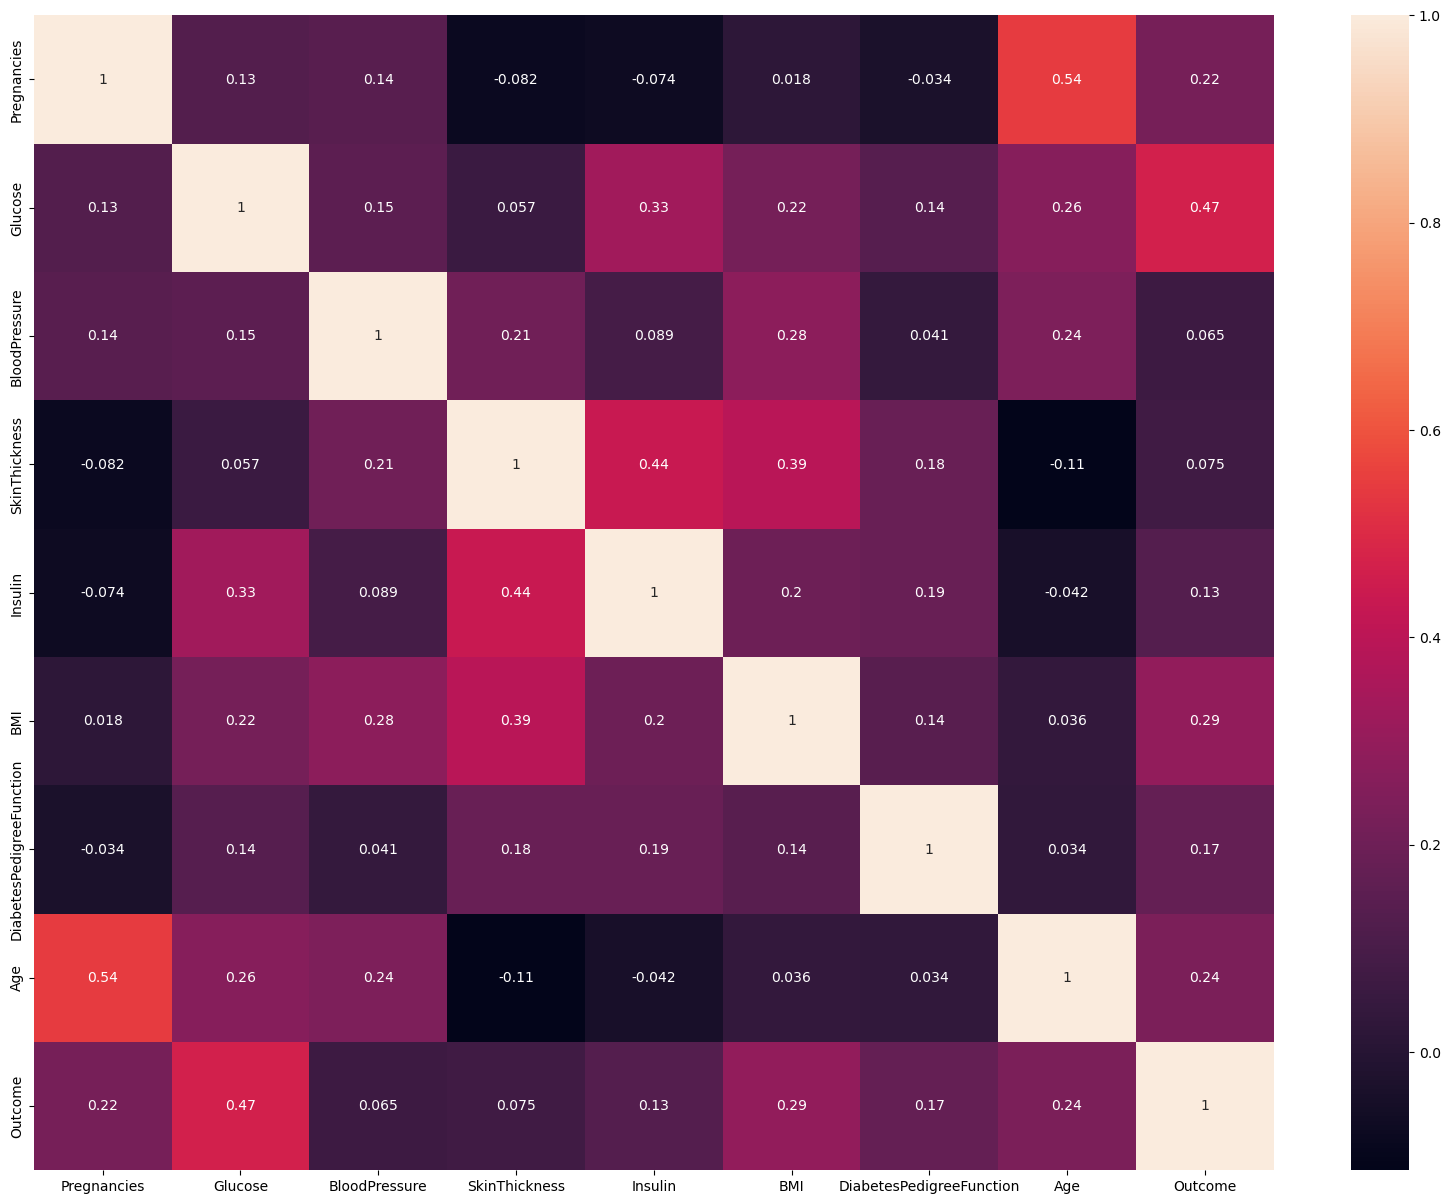

In [4]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.savefig('Diabetes.png')

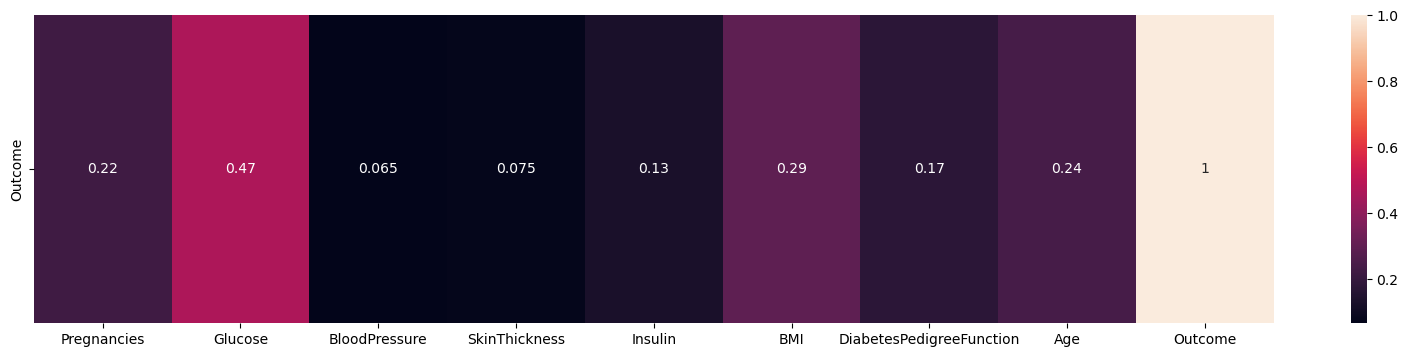

In [5]:
plt.figure(figsize = (20,4))
sns.heatmap(df.corr().tail(1), annot = True)
plt.savefig('Outcome.png')

In [6]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [7]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 2)

In [10]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
    
vif_list

[3.3644158649081,
 18.03020927261796,
 15.31315947517302,
 4.008708954886196,
 2.0639401020577575,
 18.515112351689208,
 3.2134496835269077,
 13.50053104068582]

In [11]:
vif_values = pd.Series(vif_list, index = x.columns)
vif_values

Pregnancies                  3.364416
Glucose                     18.030209
BloodPressure               15.313159
SkinThickness                4.008709
Insulin                      2.063940
BMI                         18.515112
DiabetesPedigreeFunction     3.213450
Age                         13.500531
dtype: float64

<Axes: >

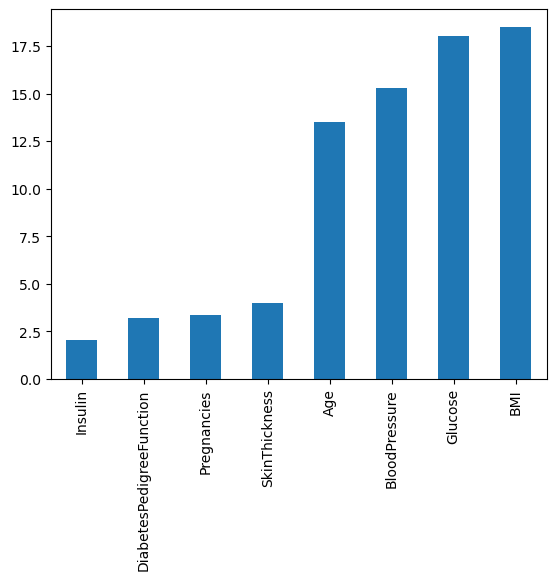

In [12]:
vif_values.sort_values().plot(kind = 'bar')

In [15]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124,74,36,0,27.8,0.100,30
429,1,95,82,25,180,35.0,0.233,43
623,0,94,70,27,115,43.5,0.347,21
209,7,184,84,33,0,35.5,0.355,41
589,0,73,0,0,0,21.1,0.342,25
...,...,...,...,...,...,...,...,...
534,1,77,56,30,56,33.3,1.251,24
584,8,124,76,24,600,28.7,0.687,52
493,4,125,70,18,122,28.9,1.144,45
527,3,116,74,15,105,26.3,0.107,24


In [16]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2,88,74,19,53,29.0,0.229,22
251,2,129,84,0,0,28.0,0.284,27
631,0,102,78,40,90,34.5,0.238,24
757,0,123,72,0,0,36.3,0.258,52
689,1,144,82,46,180,46.1,0.335,46
...,...,...,...,...,...,...,...,...
733,2,106,56,27,165,29.0,0.426,22
441,2,83,66,23,50,32.2,0.497,22
627,0,132,78,0,0,32.4,0.393,21
84,5,137,108,0,0,48.8,0.227,37


In [17]:
y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

In [18]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64

In [19]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [20]:
linear_reg.coef_

array([ 0.02604481,  0.00636631, -0.00238738,  0.00072783, -0.00022277,
        0.01275374,  0.16008617,  0.00127011])

In [21]:
np.around(linear_reg.coef_, 2)

array([ 0.03,  0.01, -0.  ,  0.  , -0.  ,  0.01,  0.16,  0.  ])

In [22]:
linear_reg.intercept_

-0.8702366919117848

In [23]:
np.around(linear_reg.intercept_, 1)

-0.9

### Model Evaluation

In [24]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is :", mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error is :',rmse)

mae = mean_absolute_error(y_test, y_pred)
print(' Mean Absolute Error is :', mae)

r2_value = r2_score(y_test, y_pred)
print(' R_Sqaured Value is :', r2_value)

n = x_test.shape[0]
k = x_test.shape[1]

adj_r2 = 1-(1-r2_value)*(n-1)/(n-k-1)
print('Adjusted R_Sqaured Value is :', adj_r2)

Mean Squared Error is : 0.16727932535648796
Root Mean Squared Error is : 0.408997952753419
 Mean Absolute Error is : 0.33472075861494355
 R_Sqaured Value is : 0.19119337815403303
Adjusted R_Sqaured Value is : 0.14656956453494518


In [25]:
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error is :',  mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error is :', rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print(' Mean Absolute Error is :', mae)

r2_value = r2_score(y_train, y_pred_train)
print(' R_Sqaured Value is :', r2_value)

n = x_train.shape[0]
k = x_train.shape[1]

adj_r2 = 1-(1-r2_value)*(n-1)/(n-k-1)
print('Adjusted R_Sqaured Value is :', adj_r2)

Mean Squared Error is : 0.156717336980716
Root Mean Squared Error is : 0.39587540588007736
 Mean Absolute Error is : 0.32987671971059757
 R_Sqaured Value is : 0.32240192248939703
Adjusted R_Sqaured Value is : 0.3134419479107444


In [26]:
r_squared_list = []
adj_r2_list = []

for i in range(1,x_train.shape[1]+1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i], y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i],y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    
    adj_r2 = 1-(1-r2_value)*(n-1)/(n-k-1)
    adj_r2_list.append(adj_r2)

In [27]:
r_squared_list

[0.054796045360701595,
 0.2656823343411636,
 0.2664885152429266,
 0.2732057830661333,
 0.2751269435240792,
 0.3094284412776709,
 0.32184018761631195,
 0.32240192248939703]

In [28]:
adj_r2_list

[0.053251594454428175,
 0.263278675861102,
 0.2628810817113344,
 0.268432093628144,
 0.2691658164149022,
 0.302602363267236,
 0.3140066584303618,
 0.3134419479107444]

In [29]:
new_x_train = x_train.copy()
new_x_train['Outcome'] = y_train
new_x_train.corr()['Outcome']

Pregnancies                 0.234086
Glucose                     0.484097
BloodPressure               0.065919
SkinThickness               0.096552
Insulin                     0.148583
BMI                         0.291046
DiabetesPedigreeFunction    0.178688
Age                         0.244214
Outcome                     1.000000
Name: Outcome, dtype: float64

In [30]:
r2_data = {'Correlation' : new_x_train.corr()['Outcome'],
          'R_Squared' : r_squared_list,
          'Adj R_Sqaured' : adj_r2_list}

r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R_Squared,Adj R_Sqaured
Pregnancies,0.234086,0.054796,0.053252
Glucose,0.484097,0.265682,0.263279
BloodPressure,0.065919,0.266489,0.262881
SkinThickness,0.096552,0.273206,0.268432
Insulin,0.148583,0.275127,0.269166
BMI,0.291046,0.309428,0.302602
DiabetesPedigreeFunction,0.178688,0.321840,0.314007
Age,0.244214,0.322402,0.313442


## Assumptions

### 1. Normality of Residual

In [31]:
residual = y_train - y_pred_train
residual

602   -0.203432
429    0.918765
623   -0.192122
209    0.131380
589    0.049890
         ...   
534   -0.177130
584    0.628035
493    0.542586
527   -0.140285
168   -0.295748
Name: Outcome, Length: 614, dtype: float64

### Checking Normality of Residual

#### 1. kdeplot

<Axes: xlabel='Outcome', ylabel='Density'>

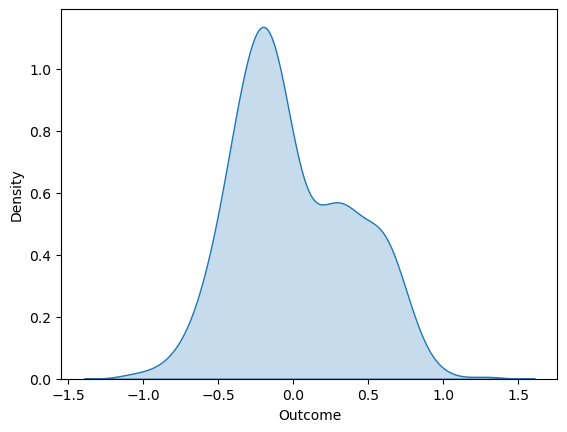

In [32]:
sns.kdeplot(residual, fill = True)

#### 2. Histplot

<Axes: xlabel='Outcome', ylabel='Count'>

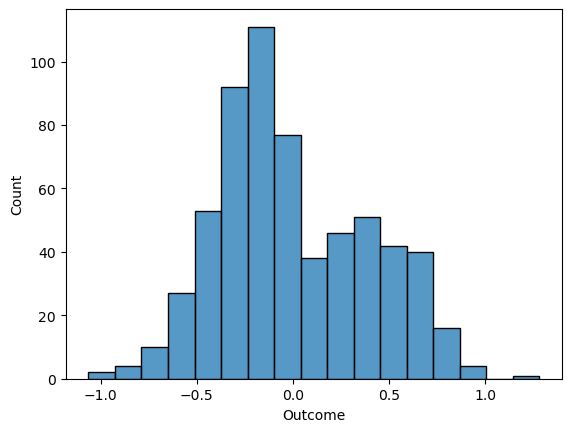

In [33]:
sns.histplot(residual)

<Axes: xlabel='Outcome', ylabel='Count'>

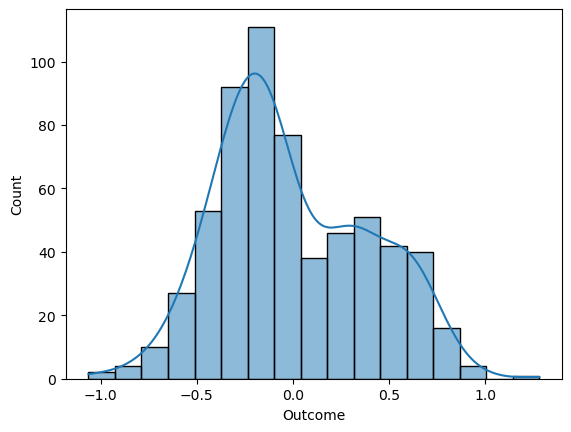

In [34]:
sns.histplot(residual , kde = True)

#### 3. Distplot

<Axes: xlabel='Outcome', ylabel='Density'>

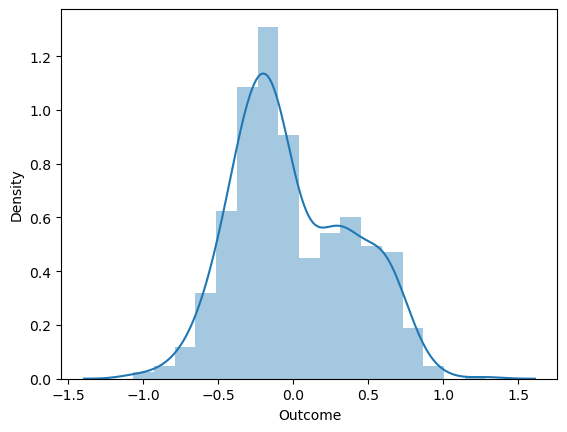

In [35]:
sns.distplot(residual)

### 2. QQ Plot

In [36]:
import statsmodels.api as sm

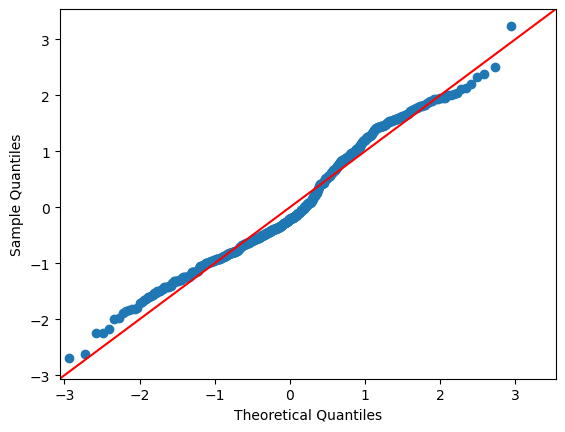

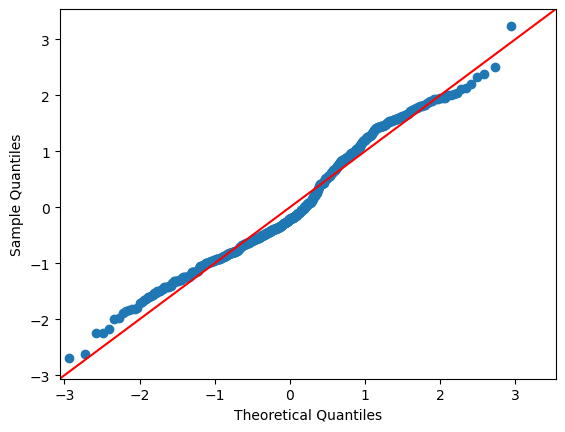

In [37]:
sm.qqplot(residual, line = '45', fit = True)

### 3. Hypothesis Testing

#### 1. Shapiro Testing

In [38]:
from scipy.stats import shapiro

In [39]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

0.9745619893074036
7.671812518594834e-09


In [40]:
_,p_val = shapiro(residual)
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is True')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P value is : 7.671812518594834e-09
Data is not normally distributed
Alternate hypothesis is true


#### 2. ks test

In [41]:
from scipy.stats import kstest

In [42]:
residual = y_train - y_pred_train
residual

602   -0.203432
429    0.918765
623   -0.192122
209    0.131380
589    0.049890
         ...   
534   -0.177130
584    0.628035
493    0.542586
527   -0.140285
168   -0.295748
Name: Outcome, Length: 614, dtype: float64

In [43]:
_,p_val = kstest(residual, 'norm')
print('P Value is :', p_val)

if p_val >= 0.05:
    print('Data is normally diatributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 1.0862390318328947e-31
Data is not normally distributed
Alternate hypothesis is true


#### 3. Normal Test

In [44]:
from scipy.stats import normaltest

In [45]:
_, p_val = normaltest(residual)
print('P Value is :', p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null Hypothesis is true')
    
else:
    print('Data is not normally distributed')
    print('Alternate Hypothesis is true')

P Value is : 5.5632982484370065e-06
Data is not normally distributed
Alternate Hypothesis is true


#### 4. Skewness

In [47]:
from scipy.stats import skew

Mean : 1.2729592985930134e-16
Median : -0.08239856868706241
Skewness : 0.32855142135979815
Skewness : 0.32774822599930675


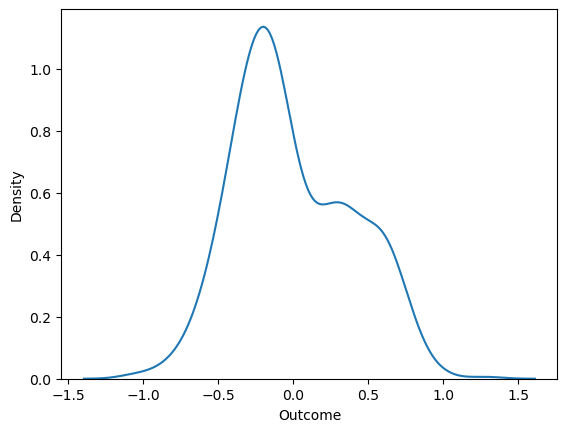

In [48]:
sns.kdeplot(residual)
s1 = residual
print('Mean :', s1.mean())
print('Median :', s1.median())
print('Skewness :', s1.skew())
print('Skewness :', skew(s1))

### 4. Homoscedasticity

In [49]:
y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

In [50]:
y_pred_train
residual_train = y_train - y_pred_train
residual

602   -0.203432
429    0.918765
623   -0.192122
209    0.131380
589    0.049890
         ...   
534   -0.177130
584    0.628035
493    0.542586
527   -0.140285
168   -0.295748
Name: Outcome, Length: 614, dtype: float64

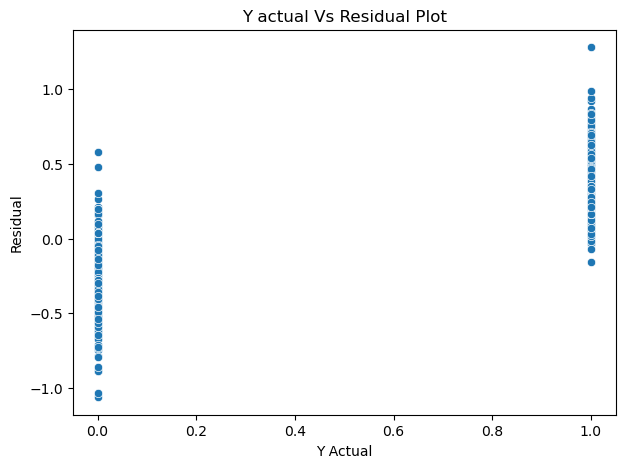

In [51]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel('Residual')
plt.title('Y actual Vs Residual Plot')
plt.savefig('Homoscedasticity.png')

In [52]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2,88,74,19,53,29.0,0.229,22
251,2,129,84,0,0,28.0,0.284,27
631,0,102,78,40,90,34.5,0.238,24
757,0,123,72,0,0,36.3,0.258,52
689,1,144,82,46,180,46.1,0.335,46
...,...,...,...,...,...,...,...,...
733,2,106,56,27,165,29.0,0.426,22
441,2,83,66,23,50,32.2,0.497,22
627,0,132,78,0,0,32.4,0.393,21
84,5,137,108,0,0,48.8,0.227,37


In [53]:
x_test[10:11]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
460,9,120,72,22,56,20.8,0.733,48


In [54]:
linear_reg.predict(x_test[10:11])[0]

0.4033558218389932

In [55]:
column_names = x.columns.tolist()
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [56]:
x.shape[1]

8

In [57]:
linear_reg.n_features_in_

8

In [63]:
Pregnancies = 9
Glucose = 120
BloodPressure = 72
SkinThickness = 22
Insulin = 56
BMI = 20.8
DiabetesPedigreeFunction = 0.733
Age = 48

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = Pregnancies
test_array[0,1] = Glucose
test_array[0,2] = BloodPressure
test_array[0,3] = SkinThickness
test_array[0,4] = Insulin
test_array[0,5] = BMI
test_array[0,6] = DiabetesPedigreeFunction
test_array[0,7] = Age

predict_diabetic_condition = np.around(linear_reg.predict(test_array)[0],0)
predict_diabetic_condition

0.0

In [59]:
with open('linear_regression.pkl', 'wb') as f:
    pickle.dump(linear_reg, f)